# Predicting Patient have diabetes or not
# *(Using Support Vector Machine)*

# _______________________________________________________________

## Importing Dependencies

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [82]:
diabetes_data=pd.read_csv('diabetes.csv')

## Data Analysis

In [9]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes_data.shape

(768, 9)

In [11]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Data Visualization

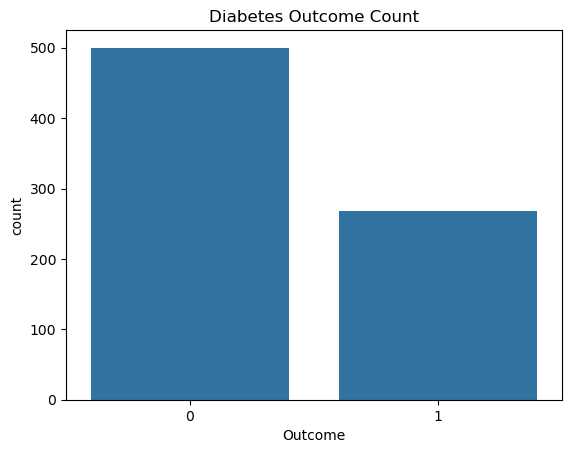

In [33]:
sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Diabetes Outcome Count')
plt.show()

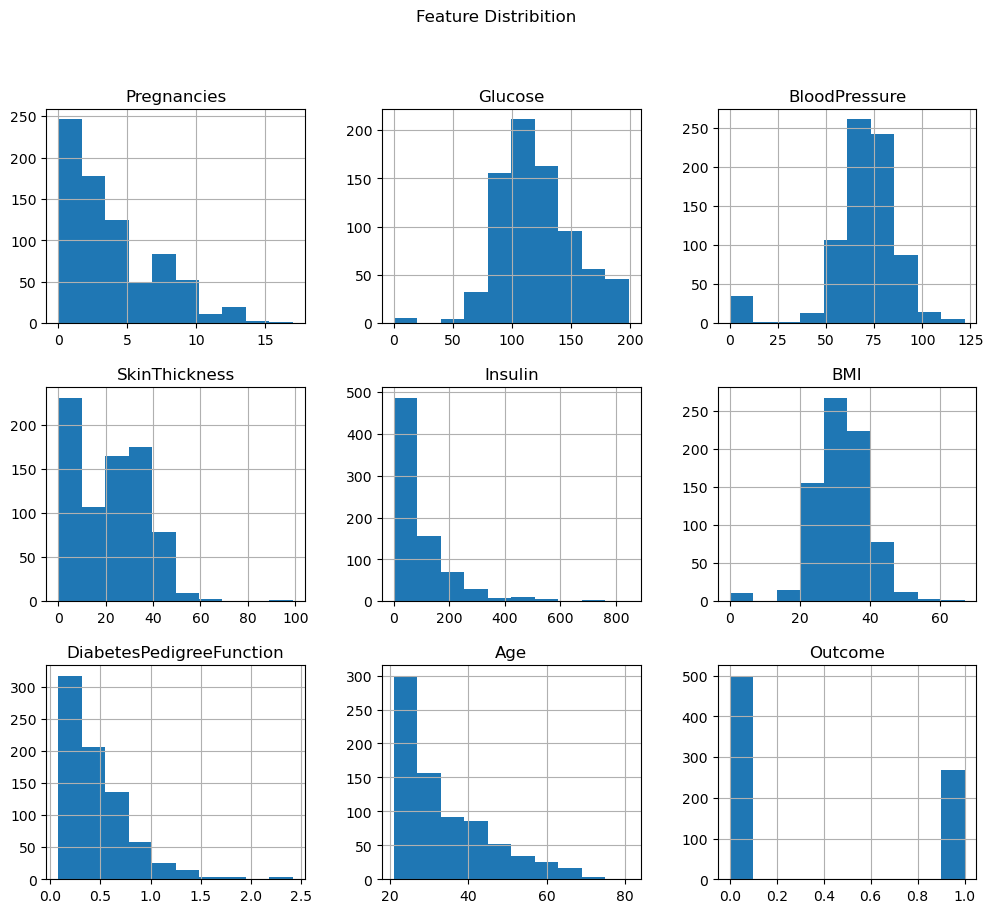

In [25]:
diabetes_data.hist(figsize=(12,10))
plt.suptitle('Feature Distribition')
plt.show()

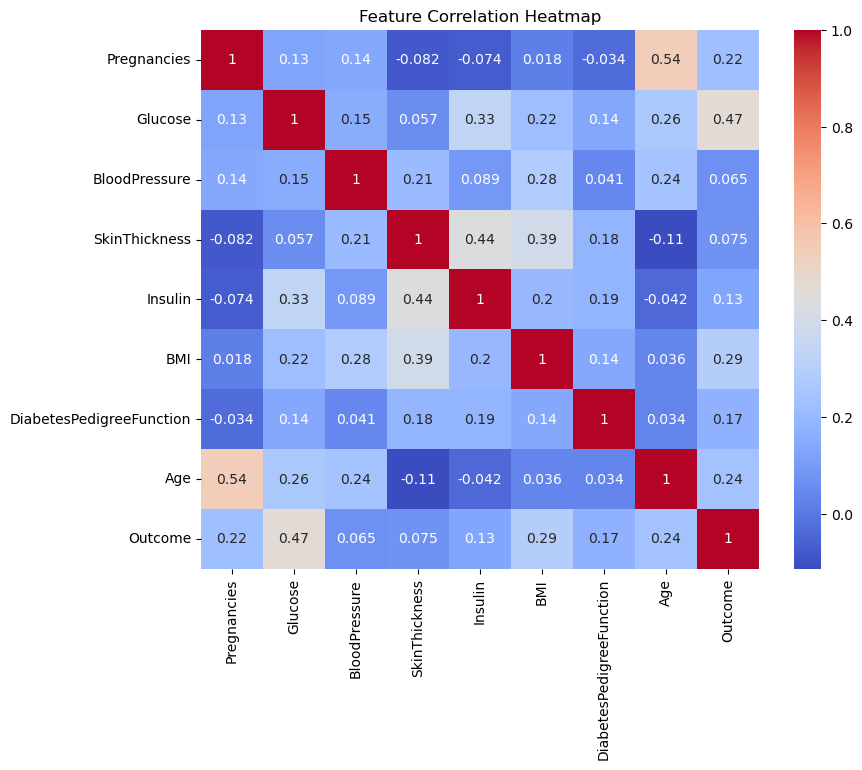

In [29]:
plt.figure(figsize=(9,7))
sns.heatmap(diabetes_data.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

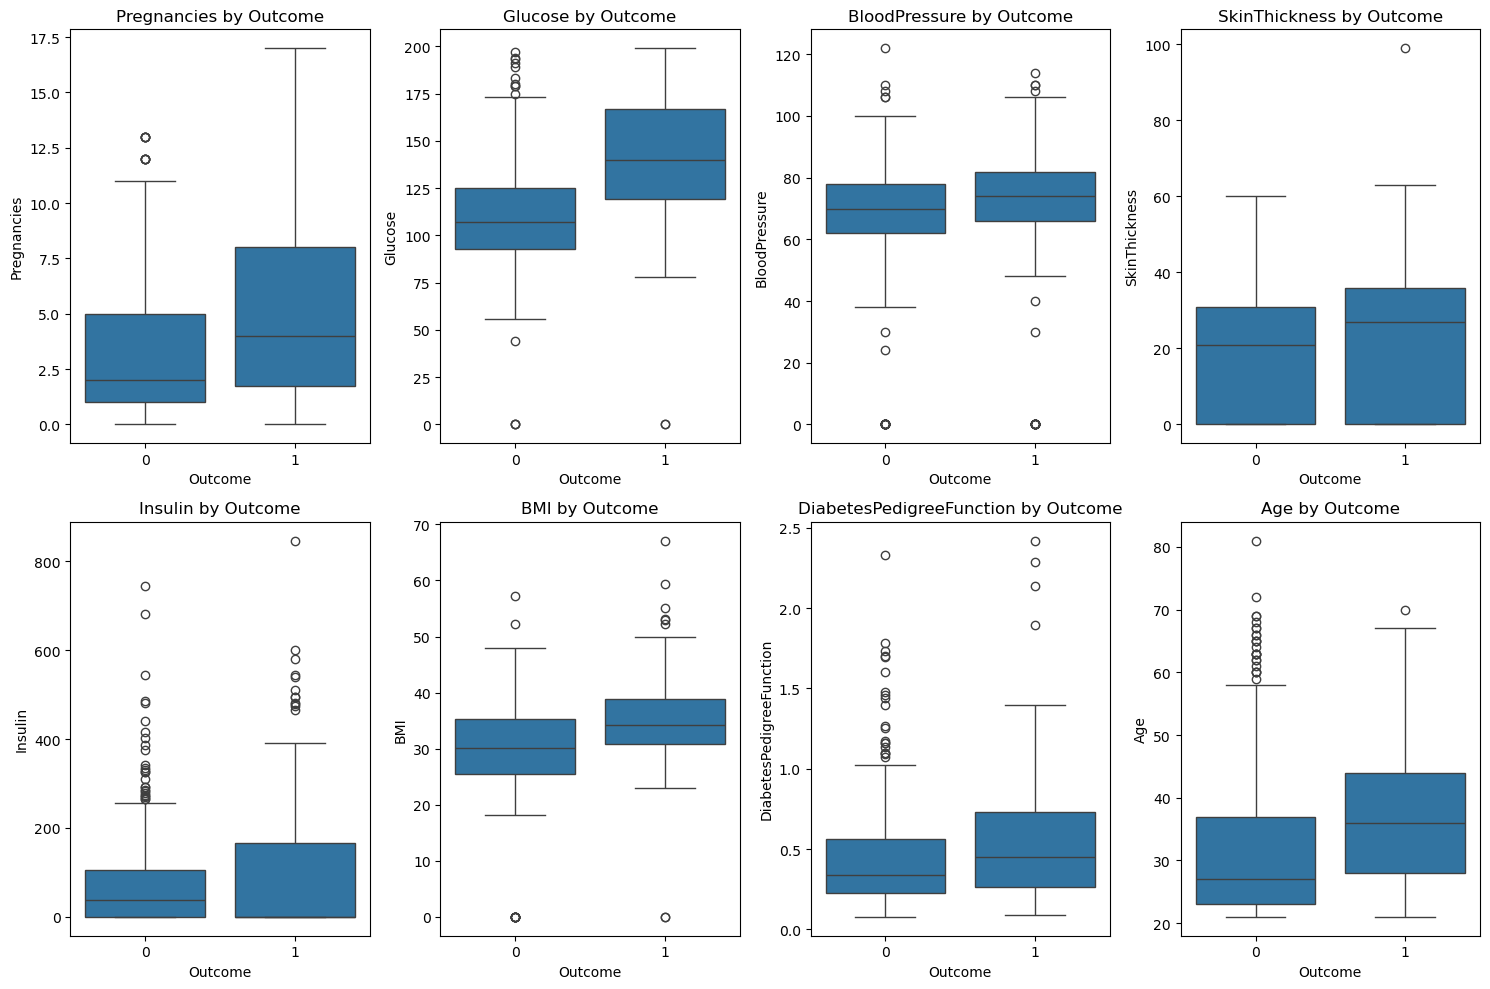

In [30]:
features = diabetes_data.columns[:-1]
plt.figure(figsize=(15,10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_data)
    plt.title(f'{feature} by Outcome')
plt.tight_layout()
plt.show()

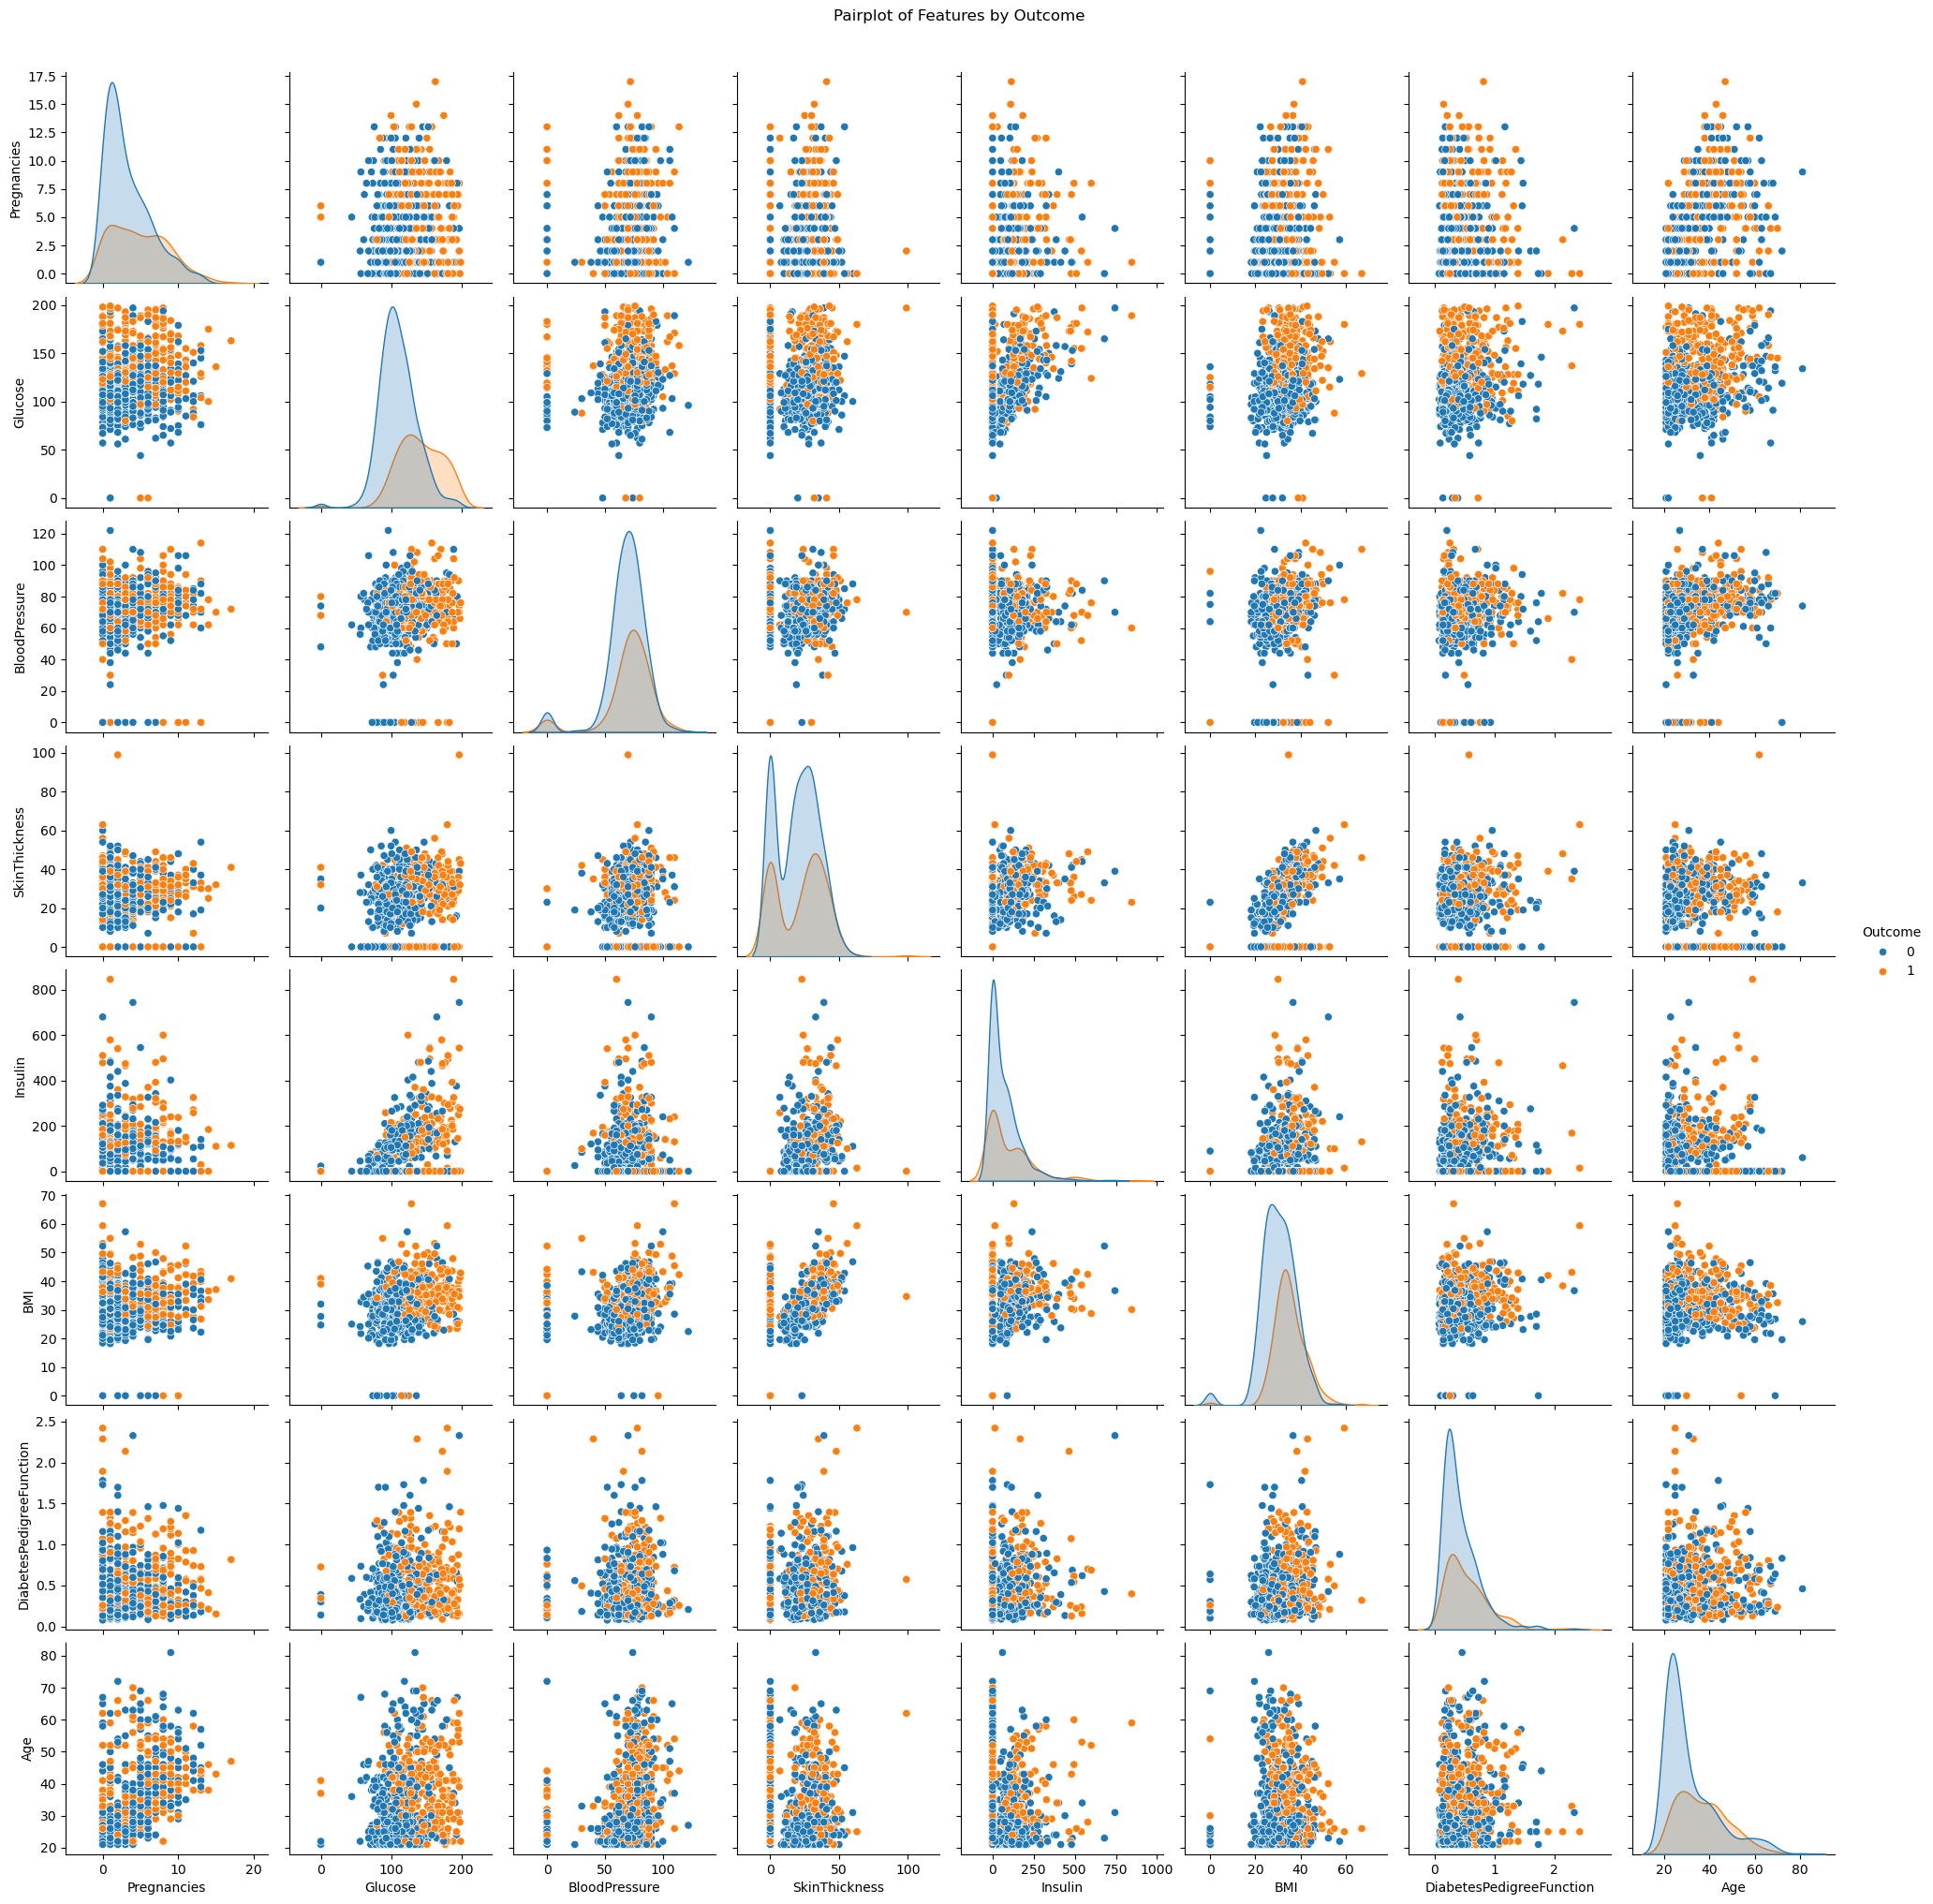

In [32]:
sns.pairplot(diabetes_data, hue='Outcome')
plt.suptitle('Pairplot of Features by Outcome', y=1.02)
plt.show()

## Data Preprocessing

In [41]:
X=diabetes_data.drop(columns='Outcome',axis=1)
Y=diabetes_data['Outcome']

In [40]:
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [39]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [43]:
scalar=StandardScaler()

In [44]:
scalar.fit(X)

StandardScaler()

In [45]:
standardized=scalar.transform(X)

In [47]:
print(standardized)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [48]:
X=standardized

## Spliting Training Testing Data

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [54]:
print(X.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


## Model Testing

In [56]:
classifier=svm.SVC(kernel='linear')

In [57]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [84]:
x_test_prediction=classifier.predict(x_test)
accuracy=accuracy_score(x_test_prediction,y_test)
print(accuracy)

0.7727272727272727


## Prediction System

In [80]:
input_data=(3,126,88,41,235,39.3,0.704,27)

np_array=np.asarray(input_data)

reshaped=np_array.reshape(1,-1)

std_data=scalar.transform(reshaped)

prediction=classifier.predict(std_data)



C:\Users\thora\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:
if prediction[0]==0:
    print('Person Dont have Diabetes')
else:
    print('Person have Diabetes')

Person Dont have Diabetes
